In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set random seed
np.random.seed(42)

In [3]:
# creating the input array
X = np.array([[1, 0, 0], [1, 0, 1], [0, 1, 0]])

print("Input:\n", X)

# shape of input array
print("\nShape of Input:", X.shape)

Input:
 [[1 0 0]
 [1 0 1]
 [0 1 0]]

Shape of Input: (3, 3)


In [4]:
# converting the input in matrix form
X = X.T
print("Input in matrix form:\n", X)

# shape of input matrix
print("\nShape of Input Matrix:", X.shape)

Input in matrix form:
 [[1 1 0]
 [0 0 1]
 [0 1 0]]

Shape of Input Matrix: (3, 3)


In [5]:
# creating the output array
y = np.array([[1], [1], [0]])

print("Actual Output:\n", y)

# output in matrix form
y = y.T

print("\nOutput in matrix form:\n", y)

# shape of input array
print("\nShape of Output:", y.shape)

Actual Output:
 [[1]
 [1]
 [0]]

Output in matrix form:
 [[1 1 0]]

Shape of Output: (1, 3)


In [7]:
# initializing weight
# Shape of weights_input_hidden should number of neurons at input layer * number of neurons at hidden layer
inputLayer_neurons= X.shape[1]
#hiddenLayer_neurons=3
outputLayer_neurons=1
weights_input_output = np.random.uniform(size=(inputLayer_neurons, outputLayer_neurons))
print(weights_input_output)

# Shape of weights_hidden_output should number of neurons at hidden layer * number of neurons at output layer
#weights_hidden_output = np.random.uniform(size=(hiddenLayer_neurons, outputLayer_neurons))
#print(weights_hidden_output)

[[0.59865848]
 [0.15601864]
 [0.15599452]]


In [8]:
weights_input_output.shape

(3, 1)

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
outputLayer_linearTransform = np.dot(weights_input_output.T, X)
print(outputLayer_linearTransform)
outputLayer_activations = sigmoid(outputLayer_linearTransform)
print(outputLayer_activations)


[[0.59865848 0.754653   0.15601864]]
[[0.64534933 0.68019172 0.53892573]]


In [13]:
output=outputLayer_activations
print(output)

[[0.64534933 0.68019172 0.53892573]]


In [14]:
error = np.square(y - output) / 2
error

array([[0.06288855, 0.05113867, 0.14522047]])

In [46]:
error_wrt_output = -(y - output)

In [47]:
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))

In [48]:
outputLayer_LinearTransform_wrt_weights_input_output = outputLayer_activations

In [49]:
 error_wrt_weights_input_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_input_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

In [50]:

print(error_wrt_weights_input_output)

[[-0.15073836]]


In [51]:
lr=0.1

In [52]:
weights_input_output= weights_input_output- lr * error_wrt_weights_input_output

In [53]:
print(weights_input_output)

[[107.32811934 107.27422677 107.3246351 ]
 [-55.22338065 -55.27727322 -55.22686489]
 [ 96.4048643   96.35097173  96.40138006]]


In [41]:
losses = []
epochs = 1000
for epoch in range(epochs):
    outputLayer_linearTransform = np.dot(weights_input_output.T, X)
    #print(outputLayer_linearTransform)
    outputLayer_activations = sigmoid(outputLayer_linearTransform)
    print(outputLayer_activations)

    error = np.square(y - output) / 2
    error
    error_wrt_output = -(y - output)
    error_wrt_weights_input_output=np.dot(error_wrt_output,X).T
   # print(error_wrt_weights_input_output)

    weights_input_output= weights_input_output- lr * error_wrt_weights_input_output

    epoch_loss = np.average(error)
    if epoch % 100 == 0:
        print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

[[1.00000000e+00 1.00000000e+00 9.94960722e-17]]
Error at epoch 0 is 0.08642
[[1.00000000e+00 1.00000000e+00 9.76793975e-17]]
[[1.00000000e+00 1.00000000e+00 9.58958931e-17]]
[[1.00000000e+00 1.00000000e+00 9.41449532e-17]]
[[1.00000000e+00 1.00000000e+00 9.24259833e-17]]
[[1.00000000e+00 1.00000000e+00 9.07383997e-17]]
[[1.00000000e+00 1.00000000e+00 8.90816292e-17]]
[[1.00000000e+00 1.00000000e+00 8.74551093e-17]]
[[1.00000000e+00 1.00000000e+00 8.58582877e-17]]
[[1.0000000e+00 1.0000000e+00 8.4290622e-17]]
[[1.000000e+00 1.000000e+00 8.275158e-17]]
[[1.00000000e+00 1.00000000e+00 8.12406389e-17]]
[[1.00000000e+00 1.00000000e+00 7.97572858e-17]]
[[1.00000000e+00 1.00000000e+00 7.83010168e-17]]
[[1.00000000e+00 1.00000000e+00 7.68713375e-17]]
[[1.00000000e+00 1.00000000e+00 7.54677624e-17]]
[[1.00000000e+00 1.00000000e+00 7.40898148e-17]]
[[1.00000000e+00 1.00000000e+00 7.27370269e-17]]
[[1.00000000e+00 1.00000000e+00 7.14089391e-17]]
[[1.00000000e+00 1.00000000e+00 7.01051006e-17]]
[

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

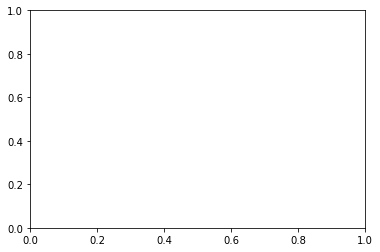

In [30]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs + 1), np.array(losses))